# **Customer Chun Project: Exploration & Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# custom_theme:
sns.set_theme(style="darkgrid", context = "paper", palette="colorblind")

# ignore warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Data.csv')

# **Data Exploration:**

## **General Look at the Data:**




In [ ]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [ ]:
df.tail(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print('The number of duplicate records is:', df.duplicated().sum())

The number of duplicate records is: 0


While attempting to convert the **TotalCharges** column to a float data type, we encountered an error indicating the presence of non-numeric values represented by empty strings. To resolve this, we will further investigate the data to identify and remove these empty string entries, enabling a successful conversion to float.

In [ ]:
# Check for Non-Numeric Values:
print('The number of non numerical values in "TotalCharges" is:', df['TotalCharges'].apply(pd.to_numeric, errors='coerce').isnull().sum())

The number of non numerical values in "TotalCharges" is: 11


In [ ]:
# Replace empty strings with NaN first
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

df.isna().sum().sort_values(ascending = False)

,0
TotalCharges,11
customerID,0
DeviceProtection,0
MonthlyCharges,0
PaymentMethod,0
PaperlessBilling,0
Contract,0
StreamingMovies,0
StreamingTV,0
TechSupport,0


We have 11 values that are missing. Sinse these values represent only **0.15%**,  we decide to delet the recods that contain them.

In [ ]:
# Delete rows that contain Nan values:
df = df.dropna(subset=['TotalCharges'])

# Let's check:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## **Explore Numerical Data:**

### **a. Descriptive Statistics:**

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### **b. Data Distribution:**

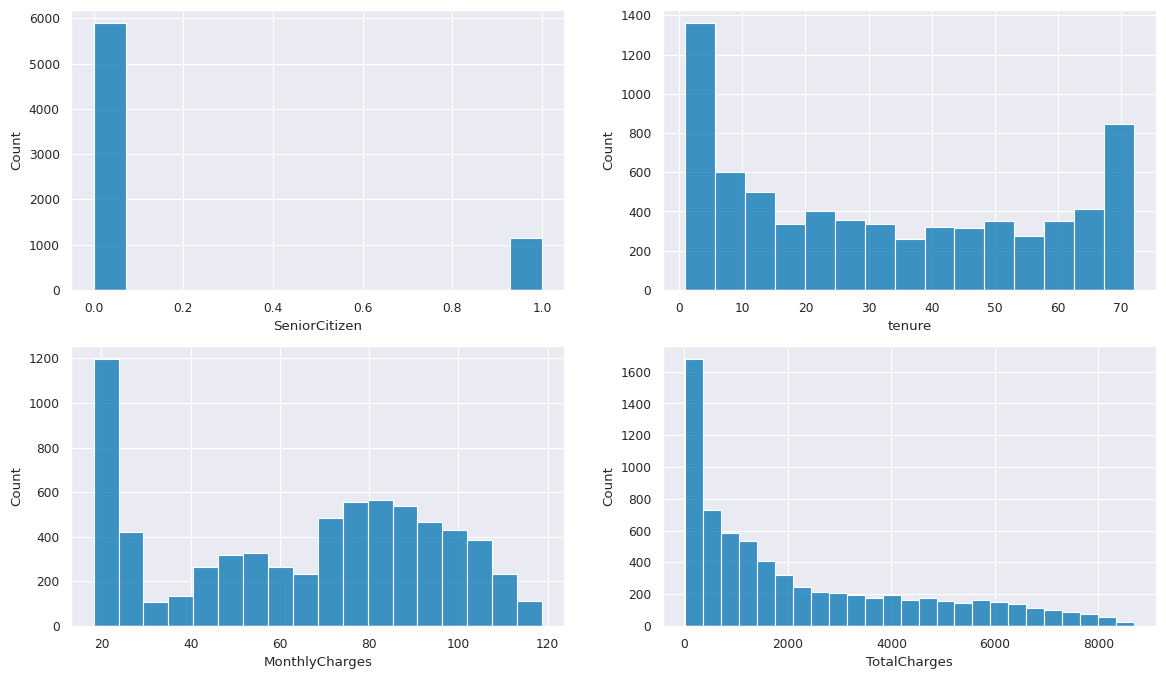

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
sns.histplot(data = df, x = 'SeniorCitizen', ax= ax[0,0])
sns.histplot(data = df, x = 'tenure', ax= ax[0,1])
sns.histplot(data = df, x = 'MonthlyCharges', ax= ax[1,0])
sns.histplot(data = df, x = 'TotalCharges', ax= ax[1,1])
plt.show()

### **c. Outlier Detection:**

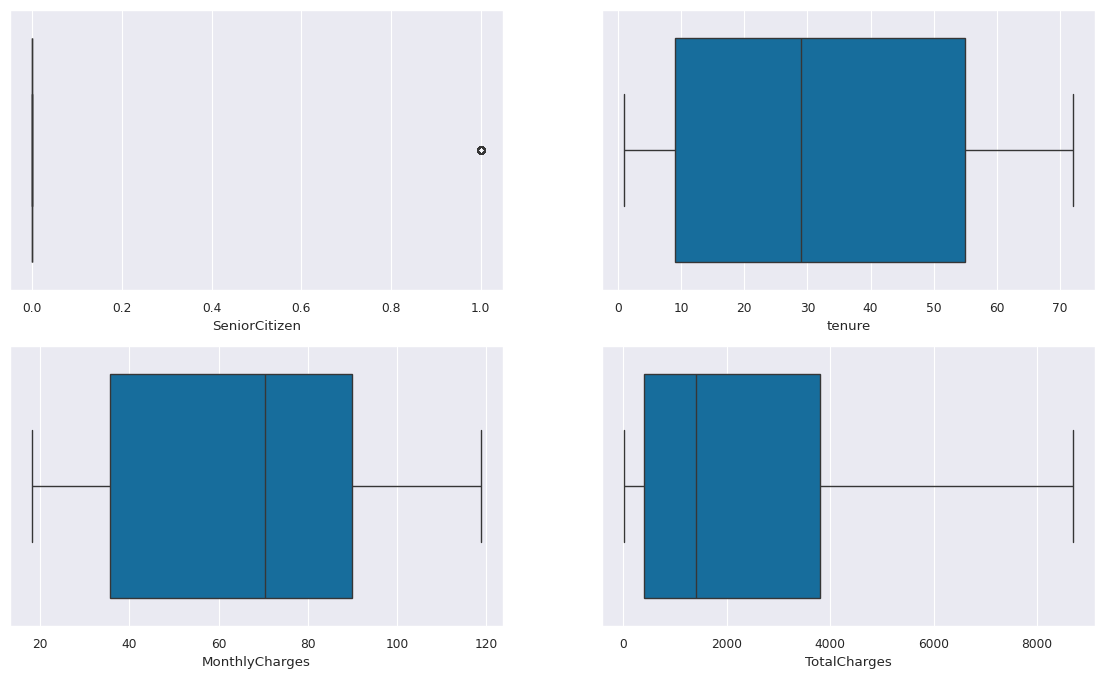

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
sns.boxplot(data = df, x = 'SeniorCitizen', ax= ax[0,0])
sns.boxplot(data = df, x = 'tenure', ax= ax[0,1])
sns.boxplot(data = df, x = 'MonthlyCharges', ax= ax[1,0])
sns.boxplot(data = df, x = 'TotalCharges', ax= ax[1,1])
plt.show()

#### **Key Findings:**

1. For **SeniorCitizen**, We can see that this feature appears to be categorical (binary: 0 or 1 representing No/Yes).
2. For **tenure**, **MonthlyCharges**, and **TotalCharges** exhibit a right-skewed distribution, indicating a concentration of data points towards lower values with a tail extending toward higher values.

<Axes: >

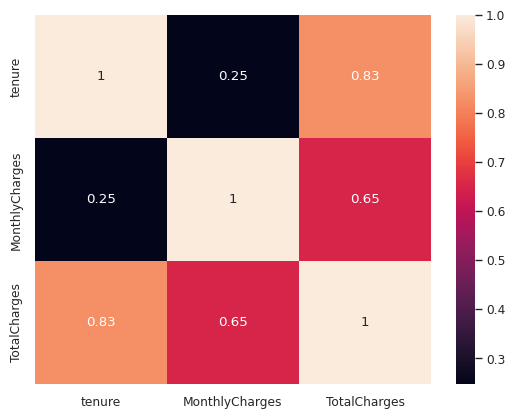

In [ ]:
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True)

## **3. Explore Non Numerical Data:**

### **a. Descriptive Statistics:**

In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


<Axes: xlabel='count', ylabel='Churn'>

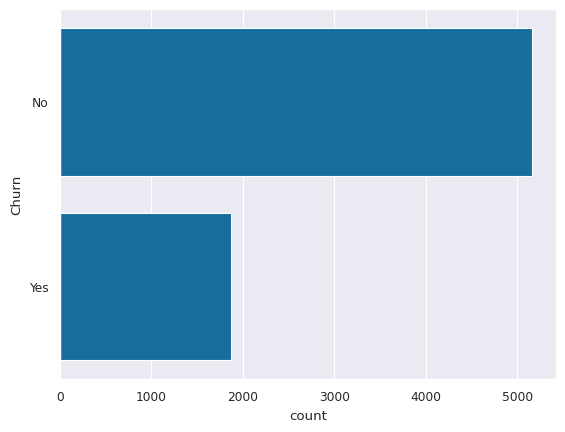

In [ ]:
sns.countplot(data = df, y = 'Churn')

In [ ]:
print("The churn Rate is:", round((sum(df['Churn'] == "Yes") / len(df))*100, 2),"%")

print("The Retention Rate is:", (1- round((sum(df['Churn'] == "Yes") / len(df)), 3))* 100, "%")

The churn Rate is: 26.58 %
The Retention Rate is: 73.4 %


# **Analyze Churn Distribution Across different clusters:**

## **1. Demographics:**

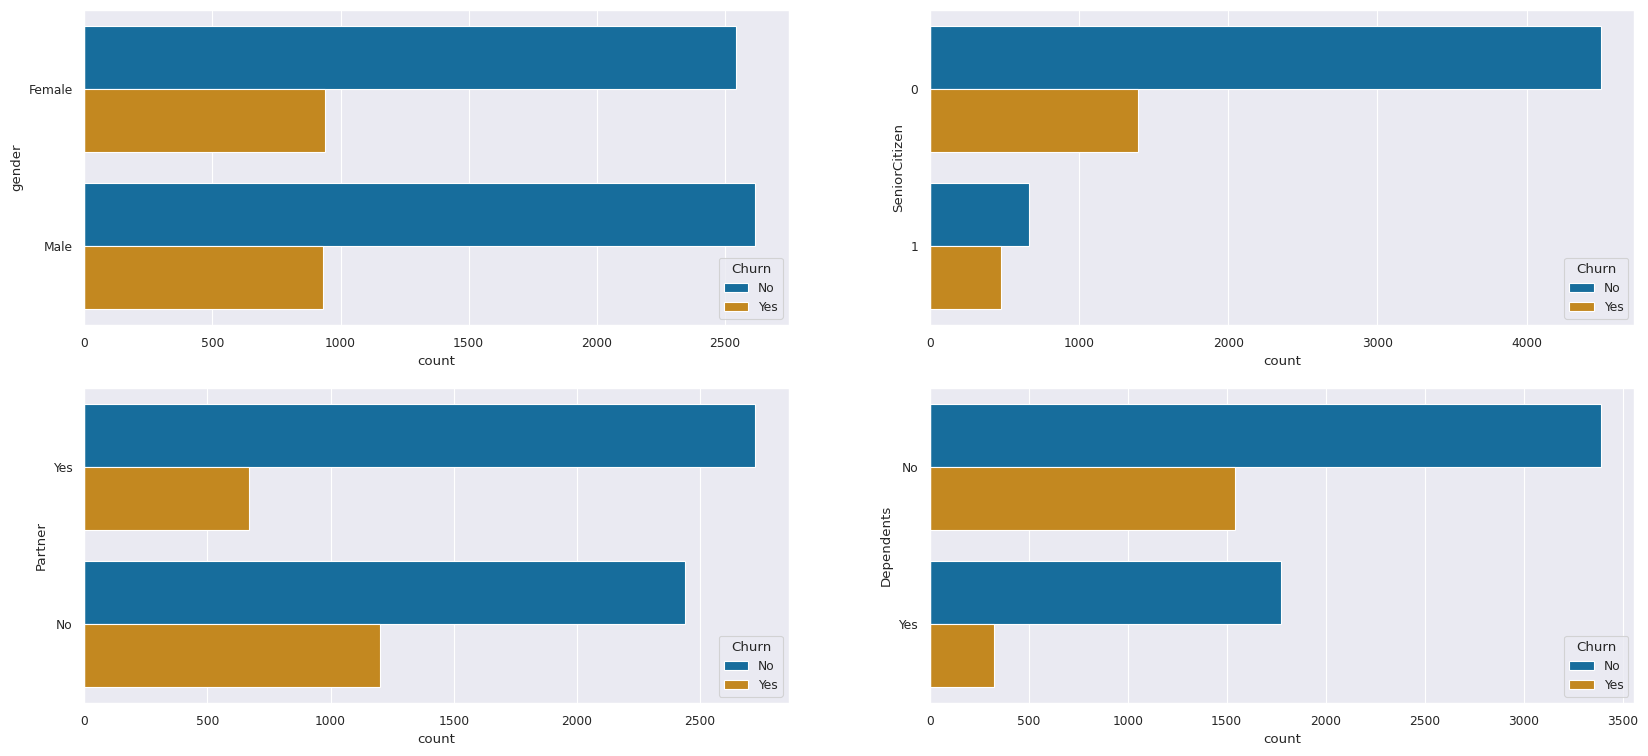

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 9))
sns.countplot(data = df, y = df['gender'], hue = 'Churn', ax= ax[0,0])
sns.countplot(data = df, y = df['SeniorCitizen'], hue = 'Churn', ax= ax[0,1])
sns.countplot(data = df, y = df['Partner'], hue = 'Churn', ax= ax[1,0])
sns.countplot(data = df, y = df['Dependents'], hue = 'Churn', ax= ax[1,1])
plt.show()

## **2.service usage:**

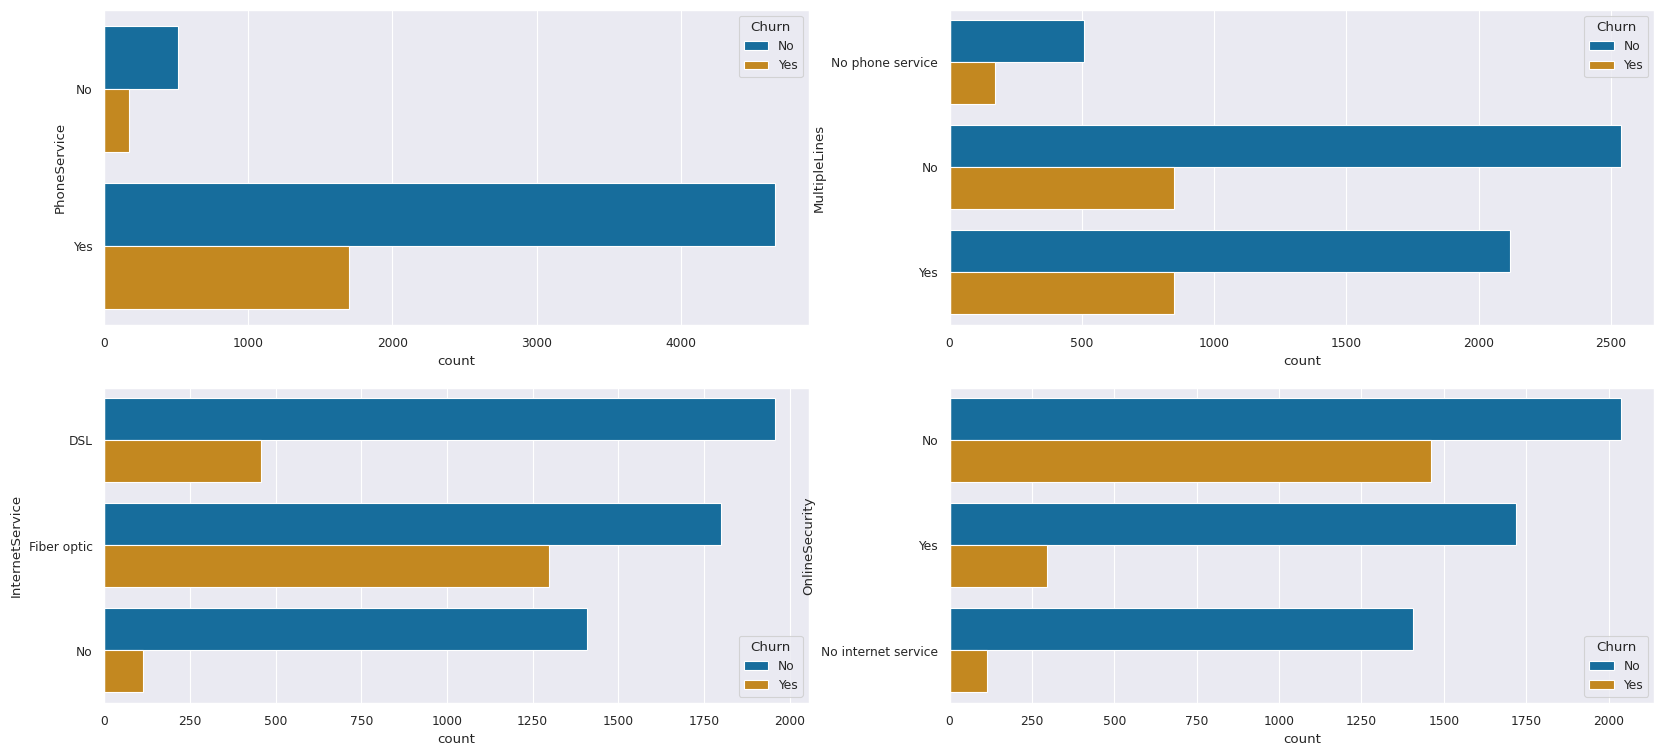

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 9))
sns.countplot(data = df, y = df['PhoneService'], hue = 'Churn', ax= ax[0,0])
sns.countplot(data = df, y = df['MultipleLines'], hue = 'Churn', ax= ax[0,1])
sns.countplot(data = df, y = df['InternetService'], hue = 'Churn', ax= ax[1,0])
sns.countplot(data = df, y = df['OnlineSecurity'], hue = 'Churn', ax= ax[1,1])
plt.show()

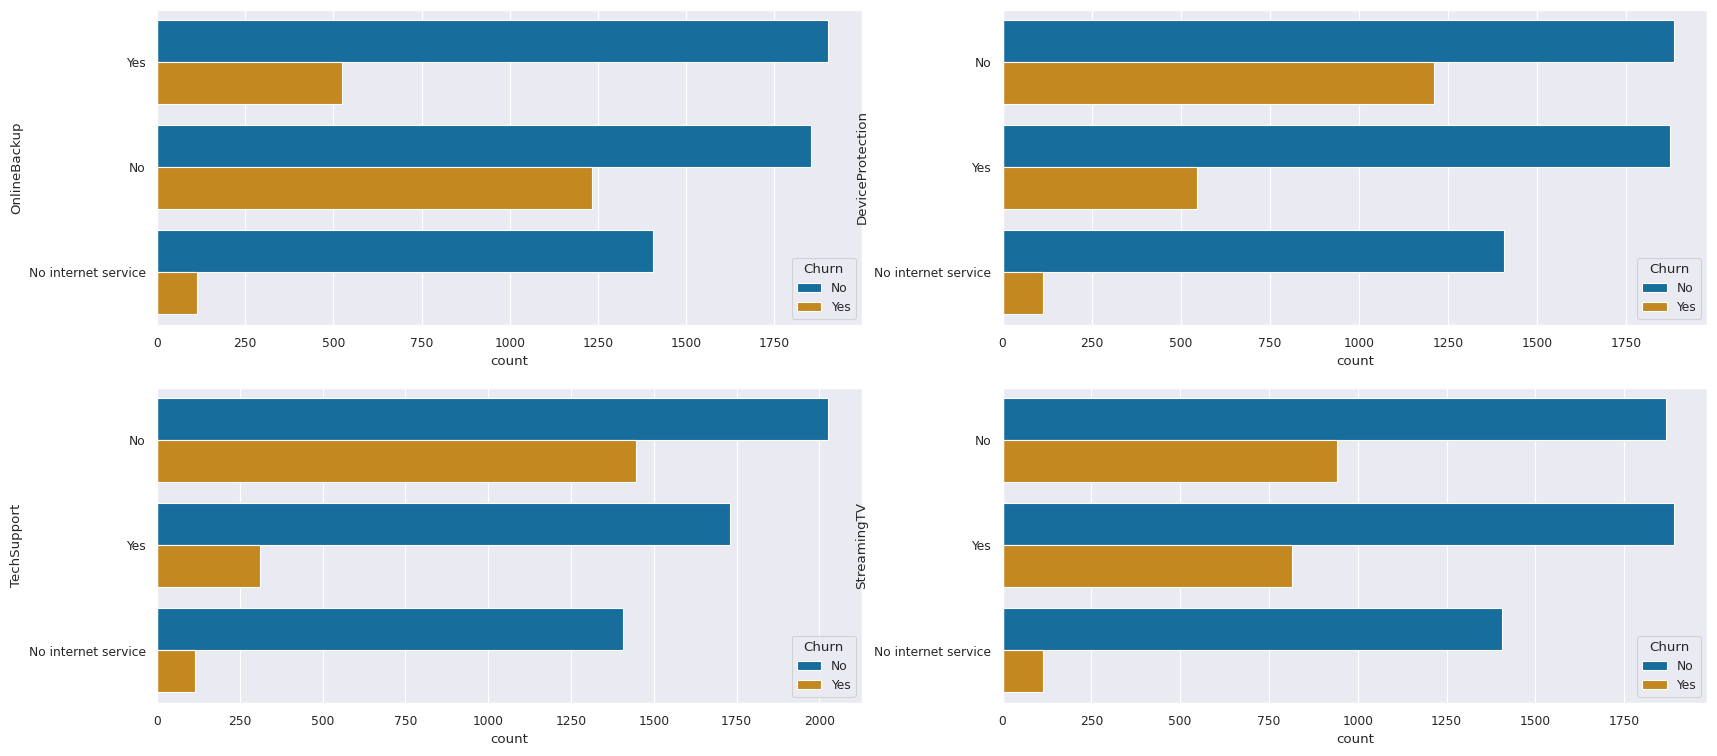

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 9))
sns.countplot(data = df, y = df['OnlineBackup'], hue = 'Churn', ax= ax[0,0])
sns.countplot(data = df, y = df['DeviceProtection'], hue = 'Churn', ax= ax[0,1])
sns.countplot(data = df, y = df['TechSupport'], hue = 'Churn', ax= ax[1,0])
sns.countplot(data = df, y = df['StreamingTV'], hue = 'Churn', ax= ax[1,1])
plt.show()

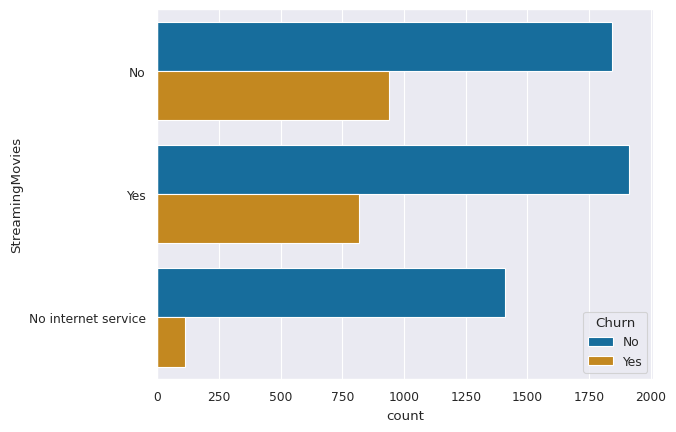

In [ ]:
sns.countplot(data = df, y = df['StreamingMovies'], hue = 'Churn')
plt.show()

## **3. Contract & billing:**

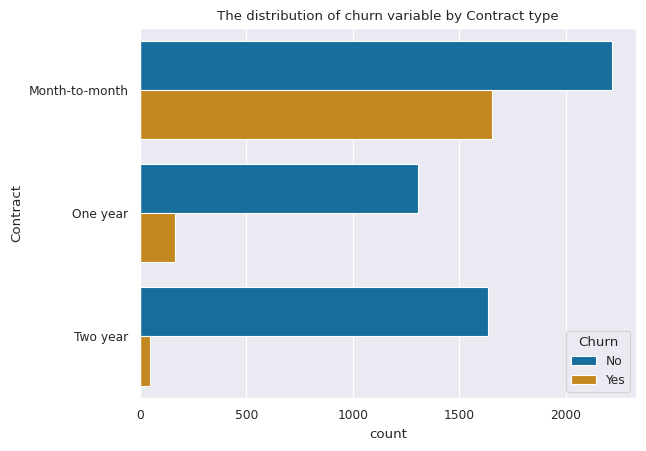

In [ ]:
sns.countplot(data = df, y = df['Contract'], hue = 'Churn')
plt.title('The distribution of churn variable by Contract type')
plt.show()

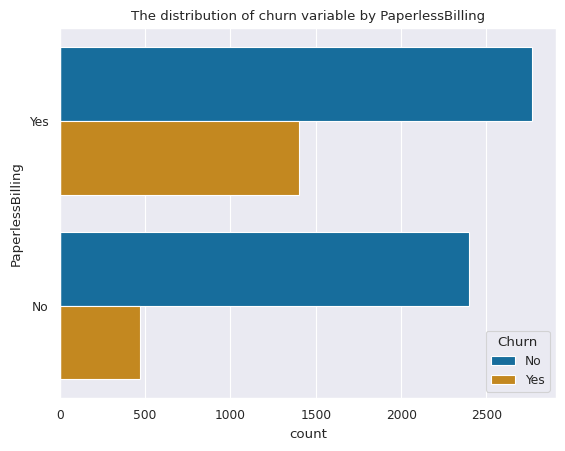

In [ ]:
sns.countplot(data = df, y = df['PaperlessBilling'], hue = 'Churn')
plt.title('The distribution of churn variable by PaperlessBilling')
plt.show()

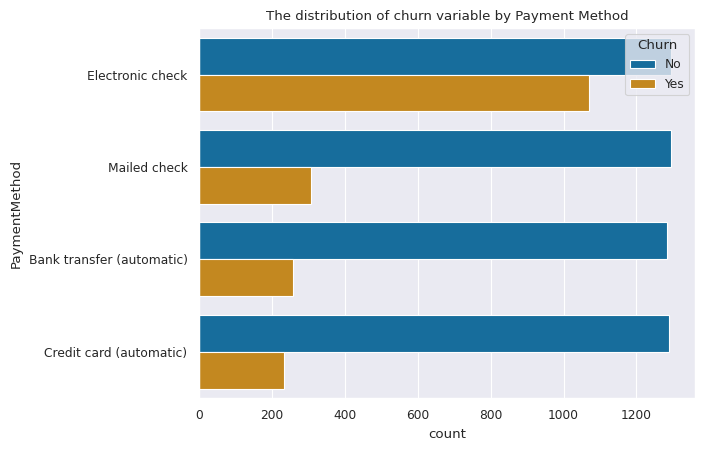

In [ ]:
sns.countplot(data = df, y = df['PaymentMethod'], hue = 'Churn')
plt.title('The distribution of churn variable by Payment Method')
plt.show()